In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('Resultsd.csv')

In [23]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['revenue'] = df['price']

In [24]:
df.set_index('datetime', inplace=True)

In [25]:
monthly_revenue = df.groupby([pd.Grouper(freq='M'), 'category'])['revenue'].sum().reset_index()

In [26]:
top_categories = monthly_revenue.groupby('category')['revenue'].sum().nlargest(10).index

In [27]:
monthly_revenue = monthly_revenue[monthly_revenue['category'].isin(top_categories)]

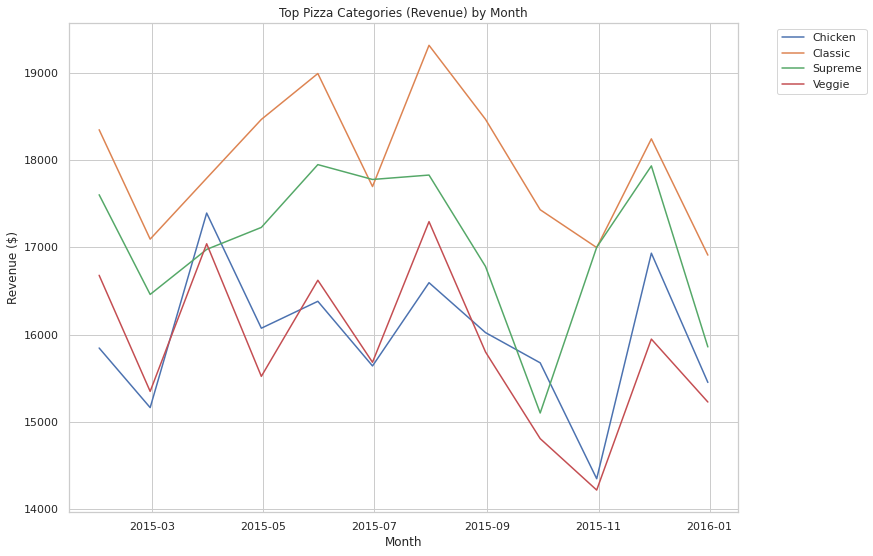

In [28]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")
sns.lineplot(x='datetime', y='revenue', hue='category', data=monthly_revenue)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Top Pizza Categories (Revenue) by Month')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.savefig('CHART7.png', dpi=300, bbox_inches='tight')

